In [2]:
import platform
import datetime
print(datetime.datetime.now())
print(platform.uname())
print("22MIA1155 MOHAMMED AASHIK F")

2023-11-24 12:06:27.389122
uname_result(system='Linux', node='hostssh', release='5.4.0-166-generic', version='#183-Ubuntu SMP Mon Oct 2 11:28:33 UTC 2023', machine='x86_64', processor='x86_64')
22MIA1155 MOHAMMED AASHIK F


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/home/bigexam/Desktop/healthcare_dataset.csv')

In [7]:
summary_stats = df.describe()
print(summary_stats)

                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000


In [8]:
df.dropna(inplace=True)

In [9]:
sorted_df = df.sort_values('Age')
print(sorted_df)

                  Name  Age  Gender Blood Type Medical Condition  \
6611  Brian Montgomery   18    Male         O-            Asthma   
7856     Emily Miranda   18    Male         A-           Obesity   
2111   Michelle Wilson   18  Female         A+      Hypertension   
5396   Joseph Williams   18  Female         A-          Diabetes   
7776   Patrick Hartman   18    Male         B+      Hypertension   
...                ...  ...     ...        ...               ...   
8602  Michael Chambers   85  Female        AB+            Cancer   
5068     Alicia Brewer   85  Female         A+            Asthma   
8656      Kelly Fowler   85    Male         O+           Obesity   
5159     Robert Cooper   85  Female         B-            Asthma   
9501        John Jones   85  Female         B+            Asthma   

     Date of Admission             Doctor                       Hospital  \
6611        2019-04-01     Timothy Gibson  Smith, Carpenter and Reynolds   
7856        2023-02-10    Phili

In [10]:
average_grp = df.groupby(['Gender', 'Blood Type'])['Age'].mean()
print(average_grp)

Gender  Blood Type
Female  A+            52.813990
        A-            51.074250
        AB+           51.748823
        AB-           51.459016
        B+            52.785938
        B-            51.018898
        O+            50.996880
        O-            50.935484
Male    A+            51.447712
        A-            50.421488
        AB+           50.946860
        AB-           52.099338
        B+            51.639073
        B-            50.648298
        O+            51.823723
        O-            51.320611
Name: Age, dtype: float64


In [11]:
admission_type_counts = df['Admission Type'].value_counts()
print(admission_type_counts)

Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64


In [13]:
top_hospitals = df.groupby('Hospital')['Billing Amount'].sum().nlargest(5)
print(top_hospitals)

Hospital
Smith and Sons    477638.881124
Smith PLC         432283.548554
Smith Ltd         428163.073062
Smith Inc         351463.888372
Williams LLC      327522.472644
Name: Billing Amount, dtype: float64


In [18]:
df['LengthofStay'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days

In [19]:
df['Medical Condition'] = df['Medical Condition'].str.extract('([A-Za-z]+)', expand=False)
average_billing_by_medical_condition = df.groupby('Medical Condition')['Billing Amount'].mean()
print(average_billing_by_medical_condition)


Medical Condition
Arthritis       25187.631255
Asthma          25416.869895
Cancer          25539.096133
Diabetes        26060.116129
Hypertension    25198.033973
Obesity         25720.842683
Name: Billing Amount, dtype: float64


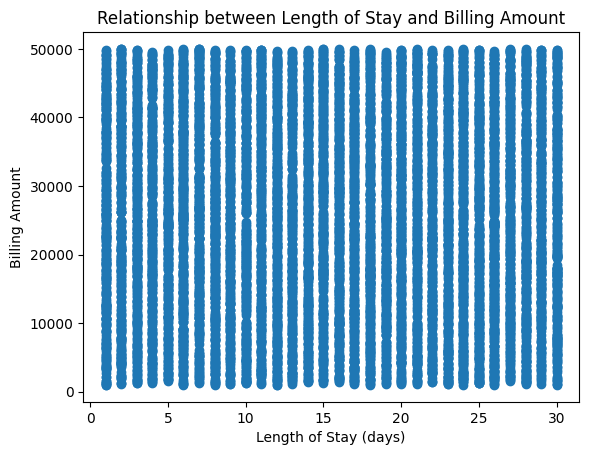

In [23]:

plt.scatter(df['LengthofStay'], df['Billing Amount'])
plt.xlabel('Length of Stay (days)')
plt.ylabel('Billing Amount')
plt.title('Relationship between Length of Stay and Billing Amount')
plt.show()


In [24]:
most_common_medical_condition = df['Medical Condition'].mode().values[0]
print(most_common_medical_condition)

Asthma


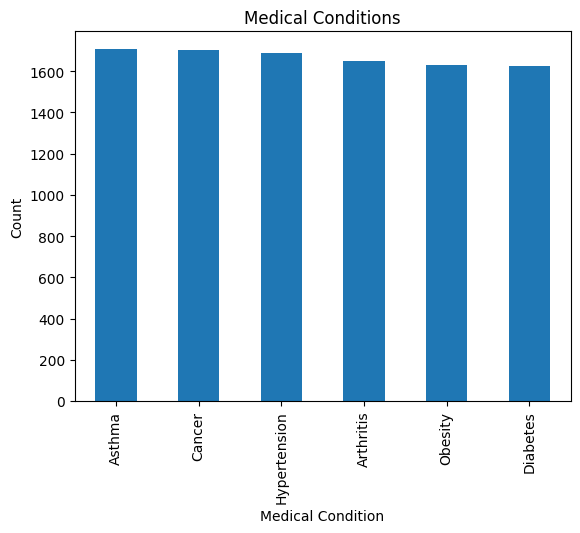

In [25]:
medical_condition_counts = df['Medical Condition'].value_counts()
medical_condition_counts.plot(kind='bar')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Medical Conditions')
plt.show()